In [1]:
import tensorflow as tf
import numpy as np

from keras.datasets import cifar10
from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, plot_model




Using TensorFlow backend.


In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
input_size = image_size * image_size * 3

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) 
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [3]:
# hyper-parameters
batch_size = 256
n_units = 256
epochs = 3

In [4]:
# model is a 3-layer MLP
model = Sequential(name='3-layer-MLP')
model.add(Dense(n_units, input_dim=input_size, activation='relu', name='input_layer'))
model.add(Dense(n_units, activation='relu', name='hidden_layer'))
model.add(Dense(num_labels, activation='softmax', name='output_layer'))
model.summary()

Model: "3-layer-MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 256)               786688    
_________________________________________________________________
hidden_layer (Dense)         (None, 256)               65792     
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Epoch 1/3


  1/196 [..............................] - ETA: 0s - loss: 2.3951 - accuracy: 0.0859

  5/196 [..............................] - ETA: 2s - loss: 2.3477 - accuracy: 0.0969

  9/196 [>.............................] - ETA: 2s - loss: 2.3282 - accuracy: 0.1072

 13/196 [>.............................] - ETA: 2s - loss: 2.3157 - accuracy: 0.1151

 17/196 [=>............................] - ETA: 2s - loss: 2.3025 - accuracy: 0.1310

 21/196 [==>...........................] - ETA: 2s - loss: 2.2949 - accuracy: 0.1367

 25/196 [==>...........................] - ETA: 2s - loss: 2.2852 - accuracy: 0.1448

 29/196 [===>..........................] - ETA: 2s - loss: 2.2747 - accuracy: 0.1549

 33/196 [====>.........................] - ETA: 2s - loss: 2.2660 - accuracy: 0.1617

 37/196 [====>.........................] - ETA: 2s - loss: 2.2588 - accuracy: 0.1653

 41/196 [=====>........................] - ETA: 2s - loss: 2.2508 - accuracy: 0.1716

 45/196 [=====>........................] - ETA: 2s - loss: 2.2435 - accuracy: 0.1769

 49/196 [======>.......................] - ETA: 1s - loss: 2.2376 - accuracy: 0.1810

 53/196 [=======>......................] - ETA: 1s - loss: 2.2309 - accuracy: 0.1863

 57/196 [=======>......................] - ETA: 1s - loss: 2.2245 - accuracy: 0.1890

 61/196 [========>.....................] - ETA: 1s - loss: 2.2190 - accuracy: 0.1929

 65/196 [========>.....................] - ETA: 1s - loss: 2.2138 - accuracy: 0.1959

 69/196 [=========>....................] - ETA: 1s - loss: 2.2076 - accuracy: 0.1997

 73/196 [==========>...................] - ETA: 1s - loss: 2.2022 - accuracy: 0.2030

 77/196 [==========>...................] - ETA: 1s - loss: 2.1975 - accuracy: 0.2055

 81/196 [===========>..................] - ETA: 1s - loss: 2.1919 - accuracy: 0.2083

 85/196 [============>.................] - ETA: 1s - loss: 2.1858 - accuracy: 0.2122

 89/196 [============>.................] - ETA: 1s - loss: 2.1807 - accuracy: 0.2156

 93/196 [=============>................] - ETA: 1s - loss: 2.1765 - accuracy: 0.2170

 97/196 [=============>................] - ETA: 1s - loss: 2.1715 - accuracy: 0.2198

101/196 [==============>...............] - ETA: 1s - loss: 2.1675 - accuracy: 0.2215

105/196 [===============>..............] - ETA: 1s - loss: 2.1629 - accuracy: 0.2237

109/196 [===============>..............] - ETA: 1s - loss: 2.1584 - accuracy: 0.2255

113/196 [================>.............] - ETA: 1s - loss: 2.1551 - accuracy: 0.2267

117/196 [================>.............] - ETA: 1s - loss: 2.1512 - accuracy: 0.2283

121/196 [=================>............] - ETA: 1s - loss: 2.1477 - accuracy: 0.2295

125/196 [==================>...........] - ETA: 0s - loss: 2.1433 - accuracy: 0.2321

129/196 [==================>...........] - ETA: 0s - loss: 2.1402 - accuracy: 0.2334

133/196 [===================>..........] - ETA: 0s - loss: 2.1362 - accuracy: 0.2347

137/196 [===================>..........] - ETA: 0s - loss: 2.1330 - accuracy: 0.2358

141/196 [====================>.........] - ETA: 0s - loss: 2.1296 - accuracy: 0.2376

145/196 [=====================>........] - ETA: 0s - loss: 2.1259 - accuracy: 0.2397

149/196 [=====================>........] - ETA: 0s - loss: 2.1229 - accuracy: 0.2410

153/196 [======================>.......] - ETA: 0s - loss: 2.1202 - accuracy: 0.2424

157/196 [=======================>......] - ETA: 0s - loss: 2.1173 - accuracy: 0.2441

161/196 [=======================>......] - ETA: 0s - loss: 2.1141 - accuracy: 0.2453

165/196 [========================>.....] - ETA: 0s - loss: 2.1114 - accuracy: 0.2468

169/196 [========================>.....] - ETA: 0s - loss: 2.1089 - accuracy: 0.2479

173/196 [=========================>....] - ETA: 0s - loss: 2.1057 - accuracy: 0.2491

177/196 [==========================>...] - ETA: 0s - loss: 2.1036 - accuracy: 0.2496

181/196 [==========================>...] - ETA: 0s - loss: 2.1004 - accuracy: 0.2514

185/196 [===========================>..] - ETA: 0s - loss: 2.0978 - accuracy: 0.2525

189/196 [===========================>..] - ETA: 0s - loss: 2.0950 - accuracy: 0.2538

193/196 [============================>.] - ETA: 0s - loss: 2.0918 - accuracy: 0.2554

196/196 [==============================] - 3s 16ms/step - loss: 2.0904 - accuracy: 0.2562 - val_loss: 1.9779 - val_accuracy: 0.2992


Epoch 2/3
  1/196 [..............................] - ETA: 0s - loss: 1.9904 - accuracy: 0.3164

  5/196 [..............................] - ETA: 2s - loss: 1.9716 - accuracy: 0.3141

  9/196 [>.............................] - ETA: 2s - loss: 1.9588 - accuracy: 0.3121

 13/196 [>.............................] - ETA: 2s - loss: 1.9592 - accuracy: 0.3101

 17/196 [=>............................] - ETA: 2s - loss: 1.9605 - accuracy: 0.3159

 21/196 [==>...........................] - ETA: 2s - loss: 1.9558 - accuracy: 0.3164

 25/196 [==>...........................] - ETA: 2s - loss: 1.9549 - accuracy: 0.3175

 29/196 [===>..........................] - ETA: 2s - loss: 1.9480 - accuracy: 0.3209

 33/196 [====>.........................] - ETA: 2s - loss: 1.9496 - accuracy: 0.3185

 37/196 [====>.........................] - ETA: 2s - loss: 1.9494 - accuracy: 0.3186

 41/196 [=====>........................] - ETA: 2s - loss: 1.9460 - accuracy: 0.3180

 45/196 [=====>........................] - ETA: 2s - loss: 1.9459 - accuracy: 0.3185

 49/196 [======>.......................] - ETA: 2s - loss: 1.9472 - accuracy: 0.3177

 53/196 [=======>......................] - ETA: 1s - loss: 1.9457 - accuracy: 0.3184

 57/196 [=======>......................] - ETA: 1s - loss: 1.9433 - accuracy: 0.3194

 61/196 [========>.....................] - ETA: 1s - loss: 1.9429 - accuracy: 0.3194

 65/196 [========>.....................] - ETA: 1s - loss: 1.9415 - accuracy: 0.3210

 69/196 [=========>....................] - ETA: 1s - loss: 1.9394 - accuracy: 0.3218

 73/196 [==========>...................] - ETA: 1s - loss: 1.9370 - accuracy: 0.3240

 77/196 [==========>...................] - ETA: 1s - loss: 1.9354 - accuracy: 0.3248

 81/196 [===========>..................] - ETA: 1s - loss: 1.9343 - accuracy: 0.3254

 85/196 [============>.................] - ETA: 1s - loss: 1.9348 - accuracy: 0.3244

 89/196 [============>.................] - ETA: 1s - loss: 1.9339 - accuracy: 0.3251

 93/196 [=============>................] - ETA: 1s - loss: 1.9329 - accuracy: 0.3256

 96/196 [=============>................] - ETA: 1s - loss: 1.9328 - accuracy: 0.3258

 99/196 [==============>...............] - ETA: 1s - loss: 1.9308 - accuracy: 0.3262

103/196 [==============>...............] - ETA: 1s - loss: 1.9302 - accuracy: 0.3268

107/196 [===============>..............] - ETA: 1s - loss: 1.9295 - accuracy: 0.3275

111/196 [===============>..............] - ETA: 1s - loss: 1.9292 - accuracy: 0.3269

115/196 [================>.............] - ETA: 1s - loss: 1.9290 - accuracy: 0.3272

119/196 [=================>............] - ETA: 1s - loss: 1.9299 - accuracy: 0.3261

123/196 [=================>............] - ETA: 1s - loss: 1.9294 - accuracy: 0.3263

127/196 [==================>...........] - ETA: 0s - loss: 1.9288 - accuracy: 0.3266

131/196 [===================>..........] - ETA: 0s - loss: 1.9284 - accuracy: 0.3265

135/196 [===================>..........] - ETA: 0s - loss: 1.9274 - accuracy: 0.3269

139/196 [====================>.........] - ETA: 0s - loss: 1.9267 - accuracy: 0.3269

143/196 [====================>.........] - ETA: 0s - loss: 1.9257 - accuracy: 0.3274

147/196 [=====================>........] - ETA: 0s - loss: 1.9244 - accuracy: 0.3284

151/196 [======================>.......] - ETA: 0s - loss: 1.9232 - accuracy: 0.3289

155/196 [======================>.......] - ETA: 0s - loss: 1.9222 - accuracy: 0.3289

159/196 [=======================>......] - ETA: 0s - loss: 1.9213 - accuracy: 0.3287

163/196 [=======================>......] - ETA: 0s - loss: 1.9202 - accuracy: 0.3289

167/196 [========================>.....] - ETA: 0s - loss: 1.9185 - accuracy: 0.3294

171/196 [=========================>....] - ETA: 0s - loss: 1.9181 - accuracy: 0.3294

174/196 [=========================>....] - ETA: 0s - loss: 1.9170 - accuracy: 0.3299

178/196 [==========================>...] - ETA: 0s - loss: 1.9160 - accuracy: 0.3303

182/196 [==========================>...] - ETA: 0s - loss: 1.9157 - accuracy: 0.3302

186/196 [===========================>..] - ETA: 0s - loss: 1.9149 - accuracy: 0.3304

190/196 [============================>.] - ETA: 0s - loss: 1.9137 - accuracy: 0.3306

194/196 [============================>.] - ETA: 0s - loss: 1.9126 - accuracy: 0.3309

196/196 [==============================] - 3s 16ms/step - loss: 1.9119 - accuracy: 0.3309 - val_loss: 1.8874 - val_accuracy: 0.3347


Epoch 3/3
  1/196 [..............................] - ETA: 0s - loss: 1.8269 - accuracy: 0.3477

  3/196 [..............................] - ETA: 3s - loss: 1.8738 - accuracy: 0.3346

  7/196 [>.............................] - ETA: 3s - loss: 1.8656 - accuracy: 0.3387

 11/196 [>.............................] - ETA: 3s - loss: 1.8725 - accuracy: 0.3370

 14/196 [=>............................] - ETA: 3s - loss: 1.8704 - accuracy: 0.3407

 18/196 [=>............................] - ETA: 3s - loss: 1.8550 - accuracy: 0.3498

 22/196 [==>...........................] - ETA: 2s - loss: 1.8524 - accuracy: 0.3540

 26/196 [==>...........................] - ETA: 2s - loss: 1.8591 - accuracy: 0.3502

 30/196 [===>..........................] - ETA: 2s - loss: 1.8586 - accuracy: 0.3508

 34/196 [====>.........................] - ETA: 2s - loss: 1.8585 - accuracy: 0.3504

 38/196 [====>.........................] - ETA: 2s - loss: 1.8564 - accuracy: 0.3521

 42/196 [=====>........................] - ETA: 2s - loss: 1.8562 - accuracy: 0.3517

 46/196 [======>.......................] - ETA: 2s - loss: 1.8560 - accuracy: 0.3522

 50/196 [======>.......................] - ETA: 2s - loss: 1.8610 - accuracy: 0.3507

 54/196 [=======>......................] - ETA: 2s - loss: 1.8607 - accuracy: 0.3516

 58/196 [=======>......................] - ETA: 2s - loss: 1.8615 - accuracy: 0.3506

 62/196 [========>.....................] - ETA: 2s - loss: 1.8615 - accuracy: 0.3509

 66/196 [=========>....................] - ETA: 1s - loss: 1.8606 - accuracy: 0.3510

 70/196 [=========>....................] - ETA: 1s - loss: 1.8603 - accuracy: 0.3506

 74/196 [==========>...................] - ETA: 1s - loss: 1.8596 - accuracy: 0.3503

 78/196 [==========>...................] - ETA: 1s - loss: 1.8591 - accuracy: 0.3514

 82/196 [===========>..................] - ETA: 1s - loss: 1.8582 - accuracy: 0.3515

 86/196 [============>.................] - ETA: 1s - loss: 1.8570 - accuracy: 0.3520

 90/196 [============>.................] - ETA: 1s - loss: 1.8558 - accuracy: 0.3530

 94/196 [=============>................] - ETA: 1s - loss: 1.8545 - accuracy: 0.3541

 98/196 [==============>...............] - ETA: 1s - loss: 1.8545 - accuracy: 0.3540

102/196 [==============>...............] - ETA: 1s - loss: 1.8573 - accuracy: 0.3525

106/196 [===============>..............] - ETA: 1s - loss: 1.8575 - accuracy: 0.3517

110/196 [===============>..............] - ETA: 1s - loss: 1.8575 - accuracy: 0.3521

114/196 [================>.............] - ETA: 1s - loss: 1.8564 - accuracy: 0.3534

118/196 [=================>............] - ETA: 1s - loss: 1.8554 - accuracy: 0.3540

122/196 [=================>............] - ETA: 1s - loss: 1.8542 - accuracy: 0.3543

126/196 [==================>...........] - ETA: 1s - loss: 1.8537 - accuracy: 0.3544

130/196 [==================>...........] - ETA: 0s - loss: 1.8523 - accuracy: 0.3547

134/196 [===================>..........] - ETA: 0s - loss: 1.8505 - accuracy: 0.3548

138/196 [====================>.........] - ETA: 0s - loss: 1.8502 - accuracy: 0.3545

139/196 [====================>.........] - ETA: 0s - loss: 1.8503 - accuracy: 0.3544

140/196 [====================>.........] - ETA: 0s - loss: 1.8507 - accuracy: 0.3544

142/196 [====================>.........] - ETA: 0s - loss: 1.8501 - accuracy: 0.3543

144/196 [=====================>........] - ETA: 0s - loss: 1.8501 - accuracy: 0.3545

147/196 [=====================>........] - ETA: 0s - loss: 1.8500 - accuracy: 0.3546

151/196 [======================>.......] - ETA: 0s - loss: 1.8492 - accuracy: 0.3543

155/196 [======================>.......] - ETA: 0s - loss: 1.8489 - accuracy: 0.3546

159/196 [=======================>......] - ETA: 0s - loss: 1.8489 - accuracy: 0.3548

163/196 [=======================>......] - ETA: 0s - loss: 1.8487 - accuracy: 0.3547

167/196 [========================>.....] - ETA: 0s - loss: 1.8481 - accuracy: 0.3553

171/196 [=========================>....] - ETA: 0s - loss: 1.8479 - accuracy: 0.3554

175/196 [=========================>....] - ETA: 0s - loss: 1.8471 - accuracy: 0.3553

179/196 [==========================>...] - ETA: 0s - loss: 1.8471 - accuracy: 0.3554

183/196 [===========================>..] - ETA: 0s - loss: 1.8461 - accuracy: 0.3554

184/196 [===========================>..] - ETA: 0s - loss: 1.8459 - accuracy: 0.3555

187/196 [===========================>..] - ETA: 0s - loss: 1.8450 - accuracy: 0.3557

191/196 [============================>.] - ETA: 0s - loss: 1.8442 - accuracy: 0.3559

195/196 [============================>.] - ETA: 0s - loss: 1.8433 - accuracy: 0.3562

196/196 [==============================] - 3s 17ms/step - loss: 1.8433 - accuracy: 0.3563 - val_loss: 1.8538 - val_accuracy: 0.3381


 1/40 [..............................] - ETA: 0s - loss: 1.9163 - accuracy: 0.3125

 9/40 [=====>........................] - ETA: 0s - loss: 1.8455 - accuracy: 0.3477

14/40 [=========>....................] - ETA: 0s - loss: 1.8519 - accuracy: 0.3468

17/40 [===========>..................] - ETA: 0s - loss: 1.8528 - accuracy: 0.3444

22/40 [===============>..............] - ETA: 0s - loss: 1.8540 - accuracy: 0.3422

25/40 [=================>............] - ETA: 0s - loss: 1.8514 - accuracy: 0.3417

32/40 [=======================>......] - ETA: 0s - loss: 1.8545 - accuracy: 0.3389

40/40 [==============================] - 0s 9ms/step - loss: 1.8538 - accuracy: 0.3381



Test accuracy: 33.8%


In [6]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 3)
batch_size = 256
kernel_size = 3
pool_size = 3
filters = 32

In [8]:
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size, 
                 activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same', 
                 input_shape=input_shape,
                 name='input_layer'))

model.add(MaxPooling2D(pool_size,name='hidden_layer'))
model.add(Flatten(name='hidden_layer2'))
model.add(Dense(10, activation='softmax',name='output_layer'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Conv2D)         (None, 32, 32, 32)        896       
_________________________________________________________________
hidden_layer (MaxPooling2D)  (None, 10, 10, 32)        0         
_________________________________________________________________
hidden_layer2 (Flatten)      (None, 3200)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                32010     
Total params: 32,906
Trainable params: 32,906
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
# train the network
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=1)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/3


  1/196 [..............................] - ETA: 0s - loss: 2.6051 - accuracy: 0.1211

  2/196 [..............................] - ETA: 13s - loss: 2.4818 - accuracy: 0.1289

  3/196 [..............................] - ETA: 18s - loss: 2.4454 - accuracy: 0.1120

  4/196 [..............................] - ETA: 18s - loss: 2.4249 - accuracy: 0.1074

  5/196 [..............................] - ETA: 19s - loss: 2.4096 - accuracy: 0.1133

  6/196 [..............................] - ETA: 19s - loss: 2.3947 - accuracy: 0.1146

  7/196 [>.............................] - ETA: 19s - loss: 2.3884 - accuracy: 0.1166

  8/196 [>.............................] - ETA: 18s - loss: 2.3764 - accuracy: 0.1211

  9/196 [>.............................] - ETA: 18s - loss: 2.3647 - accuracy: 0.1233

 10/196 [>.............................] - ETA: 18s - loss: 2.3529 - accuracy: 0.1238

 11/196 [>.............................] - ETA: 17s - loss: 2.3488 - accuracy: 0.1264

 12/196 [>.............................] - ETA: 17s - loss: 2.3429 - accuracy: 0.1283

 13/196 [>.............................] - ETA: 17s - loss: 2.3375 - accuracy: 0.1274

 14/196 [=>............................] - ETA: 17s - loss: 2.3308 - accuracy: 0.1311

 15/196 [=>............................] - ETA: 17s - loss: 2.3251 - accuracy: 0.1359

 16/196 [=>............................] - ETA: 17s - loss: 2.3198 - accuracy: 0.1387

 17/196 [=>............................] - ETA: 18s - loss: 2.3128 - accuracy: 0.1425

 18/196 [=>............................] - ETA: 17s - loss: 2.3065 - accuracy: 0.1443

 19/196 [=>............................] - ETA: 17s - loss: 2.3018 - accuracy: 0.1480

 20/196 [==>...........................] - ETA: 17s - loss: 2.2994 - accuracy: 0.1480

 21/196 [==>...........................] - ETA: 17s - loss: 2.2952 - accuracy: 0.1496

 22/196 [==>...........................] - ETA: 17s - loss: 2.2914 - accuracy: 0.1515

 23/196 [==>...........................] - ETA: 17s - loss: 2.2859 - accuracy: 0.1540

 24/196 [==>...........................] - ETA: 18s - loss: 2.2827 - accuracy: 0.1549

 25/196 [==>...........................] - ETA: 18s - loss: 2.2791 - accuracy: 0.1547

 26/196 [==>...........................] - ETA: 17s - loss: 2.2757 - accuracy: 0.1558

 27/196 [===>..........................] - ETA: 17s - loss: 2.2717 - accuracy: 0.1573

 28/196 [===>..........................] - ETA: 17s - loss: 2.2676 - accuracy: 0.1586

 29/196 [===>..........................] - ETA: 17s - loss: 2.2643 - accuracy: 0.1606

 30/196 [===>..........................] - ETA: 17s - loss: 2.2617 - accuracy: 0.1620

 31/196 [===>..........................] - ETA: 17s - loss: 2.2597 - accuracy: 0.1634

 32/196 [===>..........................] - ETA: 16s - loss: 2.2567 - accuracy: 0.1644

 33/196 [====>.........................] - ETA: 16s - loss: 2.2532 - accuracy: 0.1669

 34/196 [====>.........................] - ETA: 16s - loss: 2.2503 - accuracy: 0.1692

 35/196 [====>.........................] - ETA: 16s - loss: 2.2478 - accuracy: 0.1700

 36/196 [====>.........................] - ETA: 16s - loss: 2.2463 - accuracy: 0.1699

 37/196 [====>.........................] - ETA: 16s - loss: 2.2447 - accuracy: 0.1703

 38/196 [====>.........................] - ETA: 16s - loss: 2.2439 - accuracy: 0.1702

 39/196 [====>.........................] - ETA: 16s - loss: 2.2430 - accuracy: 0.1708

 40/196 [=====>........................] - ETA: 16s - loss: 2.2396 - accuracy: 0.1727

 41/196 [=====>........................] - ETA: 16s - loss: 2.2364 - accuracy: 0.1745

 42/196 [=====>........................] - ETA: 16s - loss: 2.2335 - accuracy: 0.1764

 43/196 [=====>........................] - ETA: 15s - loss: 2.2310 - accuracy: 0.1775

 44/196 [=====>........................] - ETA: 15s - loss: 2.2294 - accuracy: 0.1787

 45/196 [=====>........................] - ETA: 15s - loss: 2.2269 - accuracy: 0.1796

 46/196 [======>.......................] - ETA: 15s - loss: 2.2237 - accuracy: 0.1816

 47/196 [======>.......................] - ETA: 15s - loss: 2.2208 - accuracy: 0.1837

 48/196 [======>.......................] - ETA: 15s - loss: 2.2184 - accuracy: 0.1852

 49/196 [======>.......................] - ETA: 15s - loss: 2.2161 - accuracy: 0.1862

 50/196 [======>.......................] - ETA: 15s - loss: 2.2150 - accuracy: 0.1866

 51/196 [======>.......................] - ETA: 14s - loss: 2.2136 - accuracy: 0.1875

 52/196 [======>.......................] - ETA: 14s - loss: 2.2121 - accuracy: 0.1882

 53/196 [=======>......................] - ETA: 14s - loss: 2.2099 - accuracy: 0.1894

 54/196 [=======>......................] - ETA: 14s - loss: 2.2080 - accuracy: 0.1905

 55/196 [=======>......................] - ETA: 14s - loss: 2.2061 - accuracy: 0.1915

 56/196 [=======>......................] - ETA: 14s - loss: 2.2041 - accuracy: 0.1922

 57/196 [=======>......................] - ETA: 14s - loss: 2.2021 - accuracy: 0.1926

 58/196 [=======>......................] - ETA: 14s - loss: 2.2001 - accuracy: 0.1937

 59/196 [========>.....................] - ETA: 14s - loss: 2.1981 - accuracy: 0.1949

 60/196 [========>.....................] - ETA: 14s - loss: 2.1976 - accuracy: 0.1945

 61/196 [========>.....................] - ETA: 14s - loss: 2.1962 - accuracy: 0.1953

 62/196 [========>.....................] - ETA: 14s - loss: 2.1950 - accuracy: 0.1959

 63/196 [========>.....................] - ETA: 14s - loss: 2.1927 - accuracy: 0.1973

 64/196 [========>.....................] - ETA: 13s - loss: 2.1895 - accuracy: 0.1987

 65/196 [========>.....................] - ETA: 13s - loss: 2.1879 - accuracy: 0.1997

 66/196 [=========>....................] - ETA: 13s - loss: 2.1865 - accuracy: 0.2000

 67/196 [=========>....................] - ETA: 13s - loss: 2.1847 - accuracy: 0.2008

 68/196 [=========>....................] - ETA: 13s - loss: 2.1829 - accuracy: 0.2016

 69/196 [=========>....................] - ETA: 13s - loss: 2.1807 - accuracy: 0.2026

 70/196 [=========>....................] - ETA: 13s - loss: 2.1796 - accuracy: 0.2028

 71/196 [=========>....................] - ETA: 13s - loss: 2.1784 - accuracy: 0.2033

 72/196 [==========>...................] - ETA: 12s - loss: 2.1766 - accuracy: 0.2038

 73/196 [==========>...................] - ETA: 12s - loss: 2.1752 - accuracy: 0.2045

 74/196 [==========>...................] - ETA: 12s - loss: 2.1736 - accuracy: 0.2055

 75/196 [==========>...................] - ETA: 12s - loss: 2.1723 - accuracy: 0.2064

 76/196 [==========>...................] - ETA: 12s - loss: 2.1705 - accuracy: 0.2070

 77/196 [==========>...................] - ETA: 12s - loss: 2.1698 - accuracy: 0.2072

 78/196 [==========>...................] - ETA: 12s - loss: 2.1688 - accuracy: 0.2080

 79/196 [===========>..................] - ETA: 12s - loss: 2.1678 - accuracy: 0.2086

 80/196 [===========>..................] - ETA: 12s - loss: 2.1660 - accuracy: 0.2090

 81/196 [===========>..................] - ETA: 12s - loss: 2.1648 - accuracy: 0.2092

 82/196 [===========>..................] - ETA: 12s - loss: 2.1634 - accuracy: 0.2096

 83/196 [===========>..................] - ETA: 11s - loss: 2.1617 - accuracy: 0.2100

 84/196 [===========>..................] - ETA: 11s - loss: 2.1606 - accuracy: 0.2102

 85/196 [============>.................] - ETA: 11s - loss: 2.1591 - accuracy: 0.2112

 86/196 [============>.................] - ETA: 11s - loss: 2.1580 - accuracy: 0.2113

 87/196 [============>.................] - ETA: 11s - loss: 2.1572 - accuracy: 0.2118

 88/196 [============>.................] - ETA: 11s - loss: 2.1562 - accuracy: 0.2123

 89/196 [============>.................] - ETA: 11s - loss: 2.1541 - accuracy: 0.2136

 90/196 [============>.................] - ETA: 11s - loss: 2.1529 - accuracy: 0.2139

 91/196 [============>.................] - ETA: 11s - loss: 2.1514 - accuracy: 0.2146

 92/196 [=============>................] - ETA: 10s - loss: 2.1500 - accuracy: 0.2151

 93/196 [=============>................] - ETA: 10s - loss: 2.1482 - accuracy: 0.2165

 94/196 [=============>................] - ETA: 10s - loss: 2.1466 - accuracy: 0.2174

 95/196 [=============>................] - ETA: 10s - loss: 2.1455 - accuracy: 0.2178

 96/196 [=============>................] - ETA: 10s - loss: 2.1437 - accuracy: 0.2187

 97/196 [=============>................] - ETA: 10s - loss: 2.1427 - accuracy: 0.2191

 98/196 [==============>...............] - ETA: 10s - loss: 2.1415 - accuracy: 0.2197

 99/196 [==============>...............] - ETA: 10s - loss: 2.1399 - accuracy: 0.2204

100/196 [==============>...............] - ETA: 10s - loss: 2.1389 - accuracy: 0.2208

101/196 [==============>...............] - ETA: 9s - loss: 2.1378 - accuracy: 0.2210 

102/196 [==============>...............] - ETA: 9s - loss: 2.1372 - accuracy: 0.2214

103/196 [==============>...............] - ETA: 9s - loss: 2.1363 - accuracy: 0.2221

104/196 [==============>...............] - ETA: 9s - loss: 2.1356 - accuracy: 0.2225

105/196 [===============>..............] - ETA: 9s - loss: 2.1337 - accuracy: 0.2238

106/196 [===============>..............] - ETA: 9s - loss: 2.1325 - accuracy: 0.2244

107/196 [===============>..............] - ETA: 9s - loss: 2.1320 - accuracy: 0.2247

108/196 [===============>..............] - ETA: 9s - loss: 2.1309 - accuracy: 0.2252

109/196 [===============>..............] - ETA: 9s - loss: 2.1306 - accuracy: 0.2251

110/196 [===============>..............] - ETA: 9s - loss: 2.1292 - accuracy: 0.2257

111/196 [===============>..............] - ETA: 9s - loss: 2.1284 - accuracy: 0.2261

112/196 [================>.............] - ETA: 8s - loss: 2.1274 - accuracy: 0.2267

113/196 [================>.............] - ETA: 8s - loss: 2.1264 - accuracy: 0.2272

114/196 [================>.............] - ETA: 8s - loss: 2.1256 - accuracy: 0.2276

115/196 [================>.............] - ETA: 8s - loss: 2.1243 - accuracy: 0.2285

116/196 [================>.............] - ETA: 8s - loss: 2.1229 - accuracy: 0.2295

117/196 [================>.............] - ETA: 8s - loss: 2.1219 - accuracy: 0.2299

118/196 [=================>............] - ETA: 8s - loss: 2.1210 - accuracy: 0.2299

119/196 [=================>............] - ETA: 8s - loss: 2.1203 - accuracy: 0.2301

120/196 [=================>............] - ETA: 8s - loss: 2.1188 - accuracy: 0.2309

121/196 [=================>............] - ETA: 8s - loss: 2.1174 - accuracy: 0.2317

122/196 [=================>............] - ETA: 7s - loss: 2.1164 - accuracy: 0.2321

123/196 [=================>............] - ETA: 7s - loss: 2.1152 - accuracy: 0.2327

124/196 [=================>............] - ETA: 7s - loss: 2.1140 - accuracy: 0.2334

125/196 [==================>...........] - ETA: 7s - loss: 2.1144 - accuracy: 0.2331

126/196 [==================>...........] - ETA: 7s - loss: 2.1141 - accuracy: 0.2329

127/196 [==================>...........] - ETA: 7s - loss: 2.1134 - accuracy: 0.2329

128/196 [==================>...........] - ETA: 7s - loss: 2.1123 - accuracy: 0.2335

129/196 [==================>...........] - ETA: 7s - loss: 2.1110 - accuracy: 0.2341

130/196 [==================>...........] - ETA: 7s - loss: 2.1104 - accuracy: 0.2341

131/196 [===================>..........] - ETA: 6s - loss: 2.1096 - accuracy: 0.2345

132/196 [===================>..........] - ETA: 6s - loss: 2.1083 - accuracy: 0.2355

133/196 [===================>..........] - ETA: 6s - loss: 2.1077 - accuracy: 0.2359

134/196 [===================>..........] - ETA: 6s - loss: 2.1059 - accuracy: 0.2372

135/196 [===================>..........] - ETA: 6s - loss: 2.1053 - accuracy: 0.2375

136/196 [===================>..........] - ETA: 6s - loss: 2.1046 - accuracy: 0.2374

137/196 [===================>..........] - ETA: 6s - loss: 2.1038 - accuracy: 0.2379

138/196 [====================>.........] - ETA: 6s - loss: 2.1028 - accuracy: 0.2383

139/196 [====================>.........] - ETA: 6s - loss: 2.1018 - accuracy: 0.2386

140/196 [====================>.........] - ETA: 6s - loss: 2.1005 - accuracy: 0.2393

141/196 [====================>.........] - ETA: 5s - loss: 2.0992 - accuracy: 0.2397

142/196 [====================>.........] - ETA: 5s - loss: 2.0978 - accuracy: 0.2406

143/196 [====================>.........] - ETA: 5s - loss: 2.0966 - accuracy: 0.2409

144/196 [=====================>........] - ETA: 5s - loss: 2.0961 - accuracy: 0.2412

145/196 [=====================>........] - ETA: 5s - loss: 2.0956 - accuracy: 0.2415

146/196 [=====================>........] - ETA: 5s - loss: 2.0941 - accuracy: 0.2421

147/196 [=====================>........] - ETA: 5s - loss: 2.0934 - accuracy: 0.2423

148/196 [=====================>........] - ETA: 5s - loss: 2.0927 - accuracy: 0.2427

149/196 [=====================>........] - ETA: 5s - loss: 2.0921 - accuracy: 0.2429

150/196 [=====================>........] - ETA: 4s - loss: 2.0909 - accuracy: 0.2439

151/196 [======================>.......] - ETA: 4s - loss: 2.0898 - accuracy: 0.2446

152/196 [======================>.......] - ETA: 4s - loss: 2.0892 - accuracy: 0.2450

153/196 [======================>.......] - ETA: 4s - loss: 2.0883 - accuracy: 0.2455

154/196 [======================>.......] - ETA: 4s - loss: 2.0875 - accuracy: 0.2461

155/196 [======================>.......] - ETA: 4s - loss: 2.0863 - accuracy: 0.2465

156/196 [======================>.......] - ETA: 4s - loss: 2.0849 - accuracy: 0.2473

157/196 [=======================>......] - ETA: 4s - loss: 2.0841 - accuracy: 0.2477

158/196 [=======================>......] - ETA: 4s - loss: 2.0830 - accuracy: 0.2481

159/196 [=======================>......] - ETA: 3s - loss: 2.0828 - accuracy: 0.2482

160/196 [=======================>......] - ETA: 3s - loss: 2.0826 - accuracy: 0.2480

161/196 [=======================>......] - ETA: 3s - loss: 2.0816 - accuracy: 0.2482

162/196 [=======================>......] - ETA: 3s - loss: 2.0809 - accuracy: 0.2486

163/196 [=======================>......] - ETA: 3s - loss: 2.0804 - accuracy: 0.2485

164/196 [========================>.....] - ETA: 3s - loss: 2.0795 - accuracy: 0.2490

165/196 [========================>.....] - ETA: 3s - loss: 2.0786 - accuracy: 0.2495

166/196 [========================>.....] - ETA: 3s - loss: 2.0773 - accuracy: 0.2504

167/196 [========================>.....] - ETA: 3s - loss: 2.0763 - accuracy: 0.2508

168/196 [========================>.....] - ETA: 2s - loss: 2.0755 - accuracy: 0.2513

169/196 [========================>.....] - ETA: 2s - loss: 2.0748 - accuracy: 0.2518

170/196 [=========================>....] - ETA: 2s - loss: 2.0740 - accuracy: 0.2523

171/196 [=========================>....] - ETA: 2s - loss: 2.0734 - accuracy: 0.2526

172/196 [=========================>....] - ETA: 2s - loss: 2.0729 - accuracy: 0.2526

173/196 [=========================>....] - ETA: 2s - loss: 2.0725 - accuracy: 0.2527

174/196 [=========================>....] - ETA: 2s - loss: 2.0716 - accuracy: 0.2532

175/196 [=========================>....] - ETA: 2s - loss: 2.0710 - accuracy: 0.2533

176/196 [=========================>....] - ETA: 2s - loss: 2.0704 - accuracy: 0.2536

177/196 [==========================>...] - ETA: 2s - loss: 2.0696 - accuracy: 0.2540

178/196 [==========================>...] - ETA: 1s - loss: 2.0689 - accuracy: 0.2543

179/196 [==========================>...] - ETA: 1s - loss: 2.0683 - accuracy: 0.2547

180/196 [==========================>...] - ETA: 1s - loss: 2.0671 - accuracy: 0.2551

181/196 [==========================>...] - ETA: 1s - loss: 2.0665 - accuracy: 0.2554

182/196 [==========================>...] - ETA: 1s - loss: 2.0651 - accuracy: 0.2559

183/196 [===========================>..] - ETA: 1s - loss: 2.0640 - accuracy: 0.2563

184/196 [===========================>..] - ETA: 1s - loss: 2.0632 - accuracy: 0.2568

185/196 [===========================>..] - ETA: 1s - loss: 2.0624 - accuracy: 0.2573

186/196 [===========================>..] - ETA: 1s - loss: 2.0620 - accuracy: 0.2575

187/196 [===========================>..] - ETA: 0s - loss: 2.0613 - accuracy: 0.2577

188/196 [===========================>..] - ETA: 0s - loss: 2.0605 - accuracy: 0.2582

189/196 [===========================>..] - ETA: 0s - loss: 2.0596 - accuracy: 0.2586

190/196 [============================>.] - ETA: 0s - loss: 2.0588 - accuracy: 0.2591

191/196 [============================>.] - ETA: 0s - loss: 2.0578 - accuracy: 0.2596

192/196 [============================>.] - ETA: 0s - loss: 2.0576 - accuracy: 0.2597

193/196 [============================>.] - ETA: 0s - loss: 2.0569 - accuracy: 0.2600

194/196 [============================>.] - ETA: 0s - loss: 2.0562 - accuracy: 0.2601

195/196 [============================>.] - ETA: 0s - loss: 2.0553 - accuracy: 0.2604

196/196 [==============================] - 21s 106ms/step - loss: 2.0549 - accuracy: 0.2607


Epoch 2/3


  1/196 [..............................] - ETA: 0s - loss: 1.9591 - accuracy: 0.3203

  2/196 [..............................] - ETA: 8s - loss: 2.0004 - accuracy: 0.2773

  3/196 [..............................] - ETA: 11s - loss: 1.9568 - accuracy: 0.2956

  4/196 [..............................] - ETA: 12s - loss: 1.9508 - accuracy: 0.3115

  5/196 [..............................] - ETA: 13s - loss: 1.9367 - accuracy: 0.3141

  6/196 [..............................] - ETA: 14s - loss: 1.9305 - accuracy: 0.3190

  7/196 [>.............................] - ETA: 15s - loss: 1.9299 - accuracy: 0.3147

  8/196 [>.............................] - ETA: 15s - loss: 1.9244 - accuracy: 0.3174

  9/196 [>.............................] - ETA: 15s - loss: 1.9231 - accuracy: 0.3194

 10/196 [>.............................] - ETA: 15s - loss: 1.9238 - accuracy: 0.3184

 11/196 [>.............................] - ETA: 15s - loss: 1.9200 - accuracy: 0.3192

 12/196 [>.............................] - ETA: 15s - loss: 1.9151 - accuracy: 0.3239

 13/196 [>.............................] - ETA: 16s - loss: 1.9186 - accuracy: 0.3233

 14/196 [=>............................] - ETA: 16s - loss: 1.9210 - accuracy: 0.3206

 15/196 [=>............................] - ETA: 16s - loss: 1.9240 - accuracy: 0.3193

 16/196 [=>............................] - ETA: 16s - loss: 1.9241 - accuracy: 0.3179

 17/196 [=>............................] - ETA: 16s - loss: 1.9263 - accuracy: 0.3173

 18/196 [=>............................] - ETA: 16s - loss: 1.9236 - accuracy: 0.3192

 19/196 [=>............................] - ETA: 16s - loss: 1.9225 - accuracy: 0.3201

 20/196 [==>...........................] - ETA: 16s - loss: 1.9224 - accuracy: 0.3211



 21/196 [==>...........................] - ETA: 16s - loss: 1.9254 - accuracy: 0.3192

 22/196 [==>...........................] - ETA: 16s - loss: 1.9255 - accuracy: 0.3194

 23/196 [==>...........................] - ETA: 16s - loss: 1.9246 - accuracy: 0.3210

 24/196 [==>...........................] - ETA: 16s - loss: 1.9265 - accuracy: 0.3187

 25/196 [==>...........................] - ETA: 16s - loss: 1.9268 - accuracy: 0.3180

 26/196 [==>...........................] - ETA: 15s - loss: 1.9253 - accuracy: 0.3176

 27/196 [===>..........................] - ETA: 16s - loss: 1.9281 - accuracy: 0.3171

 28/196 [===>..........................] - ETA: 16s - loss: 1.9283 - accuracy: 0.3188

 29/196 [===>..........................] - ETA: 16s - loss: 1.9291 - accuracy: 0.3179

 30/196 [===>..........................] - ETA: 16s - loss: 1.9276 - accuracy: 0.3172

 31/196 [===>..........................] - ETA: 16s - loss: 1.9279 - accuracy: 0.3185

 32/196 [===>..........................] - ETA: 16s - loss: 1.9251 - accuracy: 0.3203

 33/196 [====>.........................] - ETA: 15s - loss: 1.9249 - accuracy: 0.3211

 34/196 [====>.........................] - ETA: 15s - loss: 1.9223 - accuracy: 0.3230

 35/196 [====>.........................] - ETA: 15s - loss: 1.9224 - accuracy: 0.3230

 36/196 [====>.........................] - ETA: 15s - loss: 1.9241 - accuracy: 0.3206

 37/196 [====>.........................] - ETA: 15s - loss: 1.9252 - accuracy: 0.3195

 38/196 [====>.........................] - ETA: 15s - loss: 1.9256 - accuracy: 0.3196

 39/196 [====>.........................] - ETA: 15s - loss: 1.9250 - accuracy: 0.3198

 40/196 [=====>........................] - ETA: 15s - loss: 1.9235 - accuracy: 0.3218

 41/196 [=====>........................] - ETA: 15s - loss: 1.9219 - accuracy: 0.3227

 42/196 [=====>........................] - ETA: 15s - loss: 1.9213 - accuracy: 0.3227

 43/196 [=====>........................] - ETA: 15s - loss: 1.9215 - accuracy: 0.3238

 44/196 [=====>........................] - ETA: 15s - loss: 1.9231 - accuracy: 0.3228

 45/196 [=====>........................] - ETA: 15s - loss: 1.9220 - accuracy: 0.3241

 46/196 [======>.......................] - ETA: 14s - loss: 1.9223 - accuracy: 0.3229

 47/196 [======>.......................] - ETA: 14s - loss: 1.9208 - accuracy: 0.3243

 48/196 [======>.......................] - ETA: 14s - loss: 1.9199 - accuracy: 0.3237

 49/196 [======>.......................] - ETA: 14s - loss: 1.9181 - accuracy: 0.3244

 50/196 [======>.......................] - ETA: 14s - loss: 1.9175 - accuracy: 0.3241

 51/196 [======>.......................] - ETA: 14s - loss: 1.9163 - accuracy: 0.3238

 52/196 [======>.......................] - ETA: 14s - loss: 1.9147 - accuracy: 0.3249

 53/196 [=======>......................] - ETA: 14s - loss: 1.9138 - accuracy: 0.3253

 54/196 [=======>......................] - ETA: 13s - loss: 1.9135 - accuracy: 0.3251

 55/196 [=======>......................] - ETA: 13s - loss: 1.9136 - accuracy: 0.3249

 56/196 [=======>......................] - ETA: 13s - loss: 1.9128 - accuracy: 0.3246

 57/196 [=======>......................] - ETA: 13s - loss: 1.9127 - accuracy: 0.3250

 58/196 [=======>......................] - ETA: 13s - loss: 1.9116 - accuracy: 0.3252

 59/196 [========>.....................] - ETA: 13s - loss: 1.9104 - accuracy: 0.3257

 60/196 [========>.....................] - ETA: 13s - loss: 1.9090 - accuracy: 0.3260

 61/196 [========>.....................] - ETA: 13s - loss: 1.9098 - accuracy: 0.3256

 62/196 [========>.....................] - ETA: 13s - loss: 1.9092 - accuracy: 0.3262

 63/196 [========>.....................] - ETA: 12s - loss: 1.9100 - accuracy: 0.3261

 64/196 [========>.....................] - ETA: 12s - loss: 1.9089 - accuracy: 0.3267

 65/196 [========>.....................] - ETA: 12s - loss: 1.9089 - accuracy: 0.3264

 66/196 [=========>....................] - ETA: 12s - loss: 1.9088 - accuracy: 0.3266

 67/196 [=========>....................] - ETA: 12s - loss: 1.9090 - accuracy: 0.3268

 68/196 [=========>....................] - ETA: 12s - loss: 1.9078 - accuracy: 0.3273

 69/196 [=========>....................] - ETA: 12s - loss: 1.9072 - accuracy: 0.3277

 70/196 [=========>....................] - ETA: 12s - loss: 1.9057 - accuracy: 0.3283

 71/196 [=========>....................] - ETA: 12s - loss: 1.9059 - accuracy: 0.3282

 72/196 [==========>...................] - ETA: 11s - loss: 1.9059 - accuracy: 0.3285

 73/196 [==========>...................] - ETA: 11s - loss: 1.9053 - accuracy: 0.3288

 74/196 [==========>...................] - ETA: 11s - loss: 1.9043 - accuracy: 0.3295

 75/196 [==========>...................] - ETA: 11s - loss: 1.9040 - accuracy: 0.3297

 76/196 [==========>...................] - ETA: 11s - loss: 1.9046 - accuracy: 0.3301

 77/196 [==========>...................] - ETA: 11s - loss: 1.9045 - accuracy: 0.3308

 78/196 [==========>...................] - ETA: 11s - loss: 1.9041 - accuracy: 0.3311

 79/196 [===========>..................] - ETA: 11s - loss: 1.9037 - accuracy: 0.3309

 80/196 [===========>..................] - ETA: 11s - loss: 1.9032 - accuracy: 0.3310

 81/196 [===========>..................] - ETA: 11s - loss: 1.9024 - accuracy: 0.3315

 82/196 [===========>..................] - ETA: 10s - loss: 1.9023 - accuracy: 0.3312

 83/196 [===========>..................] - ETA: 10s - loss: 1.9022 - accuracy: 0.3317

 84/196 [===========>..................] - ETA: 10s - loss: 1.9012 - accuracy: 0.3322

 85/196 [============>.................] - ETA: 10s - loss: 1.9005 - accuracy: 0.3327

 86/196 [============>.................] - ETA: 10s - loss: 1.9005 - accuracy: 0.3325

 87/196 [============>.................] - ETA: 10s - loss: 1.9004 - accuracy: 0.3323

 88/196 [============>.................] - ETA: 10s - loss: 1.9010 - accuracy: 0.3314

 89/196 [============>.................] - ETA: 10s - loss: 1.8997 - accuracy: 0.3320

 90/196 [============>.................] - ETA: 10s - loss: 1.8991 - accuracy: 0.3320

 91/196 [============>.................] - ETA: 10s - loss: 1.8987 - accuracy: 0.3320

 92/196 [=============>................] - ETA: 9s - loss: 1.8981 - accuracy: 0.3324 

 93/196 [=============>................] - ETA: 9s - loss: 1.8984 - accuracy: 0.3322

 94/196 [=============>................] - ETA: 9s - loss: 1.8983 - accuracy: 0.3321

 95/196 [=============>................] - ETA: 9s - loss: 1.8989 - accuracy: 0.3320

 96/196 [=============>................] - ETA: 9s - loss: 1.8989 - accuracy: 0.3317

 97/196 [=============>................] - ETA: 9s - loss: 1.8982 - accuracy: 0.3323

 98/196 [==============>...............] - ETA: 9s - loss: 1.8978 - accuracy: 0.3324

 99/196 [==============>...............] - ETA: 9s - loss: 1.8982 - accuracy: 0.3318

100/196 [==============>...............] - ETA: 9s - loss: 1.8977 - accuracy: 0.3320

101/196 [==============>...............] - ETA: 9s - loss: 1.8967 - accuracy: 0.3322

102/196 [==============>...............] - ETA: 8s - loss: 1.8960 - accuracy: 0.3325

103/196 [==============>...............] - ETA: 8s - loss: 1.8951 - accuracy: 0.3328

104/196 [==============>...............] - ETA: 8s - loss: 1.8942 - accuracy: 0.3330

105/196 [===============>..............] - ETA: 8s - loss: 1.8937 - accuracy: 0.3333

106/196 [===============>..............] - ETA: 8s - loss: 1.8932 - accuracy: 0.3336

107/196 [===============>..............] - ETA: 8s - loss: 1.8928 - accuracy: 0.3335

108/196 [===============>..............] - ETA: 8s - loss: 1.8926 - accuracy: 0.3334

109/196 [===============>..............] - ETA: 8s - loss: 1.8918 - accuracy: 0.3338

110/196 [===============>..............] - ETA: 8s - loss: 1.8910 - accuracy: 0.3341

111/196 [===============>..............] - ETA: 8s - loss: 1.8894 - accuracy: 0.3350

112/196 [================>.............] - ETA: 7s - loss: 1.8892 - accuracy: 0.3351

113/196 [================>.............] - ETA: 7s - loss: 1.8888 - accuracy: 0.3352

114/196 [================>.............] - ETA: 7s - loss: 1.8887 - accuracy: 0.3349

115/196 [================>.............] - ETA: 7s - loss: 1.8883 - accuracy: 0.3355

116/196 [================>.............] - ETA: 7s - loss: 1.8883 - accuracy: 0.3351

117/196 [================>.............] - ETA: 7s - loss: 1.8879 - accuracy: 0.3354

118/196 [=================>............] - ETA: 7s - loss: 1.8880 - accuracy: 0.3350

119/196 [=================>............] - ETA: 7s - loss: 1.8882 - accuracy: 0.3348

120/196 [=================>............] - ETA: 7s - loss: 1.8880 - accuracy: 0.3346

121/196 [=================>............] - ETA: 7s - loss: 1.8870 - accuracy: 0.3353

122/196 [=================>............] - ETA: 6s - loss: 1.8863 - accuracy: 0.3358

123/196 [=================>............] - ETA: 6s - loss: 1.8867 - accuracy: 0.3354

124/196 [=================>............] - ETA: 6s - loss: 1.8869 - accuracy: 0.3353

125/196 [==================>...........] - ETA: 6s - loss: 1.8863 - accuracy: 0.3355

126/196 [==================>...........] - ETA: 6s - loss: 1.8858 - accuracy: 0.3359

127/196 [==================>...........] - ETA: 6s - loss: 1.8853 - accuracy: 0.3363

128/196 [==================>...........] - ETA: 6s - loss: 1.8847 - accuracy: 0.3363

129/196 [==================>...........] - ETA: 6s - loss: 1.8841 - accuracy: 0.3366

130/196 [==================>...........] - ETA: 6s - loss: 1.8839 - accuracy: 0.3367

131/196 [===================>..........] - ETA: 6s - loss: 1.8836 - accuracy: 0.3370

132/196 [===================>..........] - ETA: 5s - loss: 1.8833 - accuracy: 0.3373

133/196 [===================>..........] - ETA: 5s - loss: 1.8833 - accuracy: 0.3372

134/196 [===================>..........] - ETA: 5s - loss: 1.8838 - accuracy: 0.3368

135/196 [===================>..........] - ETA: 5s - loss: 1.8828 - accuracy: 0.3371

136/196 [===================>..........] - ETA: 5s - loss: 1.8825 - accuracy: 0.3374

137/196 [===================>..........] - ETA: 5s - loss: 1.8819 - accuracy: 0.3378

138/196 [====================>.........] - ETA: 5s - loss: 1.8813 - accuracy: 0.3381

139/196 [====================>.........] - ETA: 5s - loss: 1.8808 - accuracy: 0.3383

140/196 [====================>.........] - ETA: 5s - loss: 1.8804 - accuracy: 0.3384

141/196 [====================>.........] - ETA: 5s - loss: 1.8798 - accuracy: 0.3386

142/196 [====================>.........] - ETA: 5s - loss: 1.8790 - accuracy: 0.3390

143/196 [====================>.........] - ETA: 5s - loss: 1.8787 - accuracy: 0.3392

144/196 [=====================>........] - ETA: 4s - loss: 1.8783 - accuracy: 0.3395

145/196 [=====================>........] - ETA: 4s - loss: 1.8778 - accuracy: 0.3397

146/196 [=====================>........] - ETA: 4s - loss: 1.8775 - accuracy: 0.3398

147/196 [=====================>........] - ETA: 4s - loss: 1.8768 - accuracy: 0.3401

148/196 [=====================>........] - ETA: 4s - loss: 1.8767 - accuracy: 0.3402

149/196 [=====================>........] - ETA: 4s - loss: 1.8763 - accuracy: 0.3405

150/196 [=====================>........] - ETA: 4s - loss: 1.8760 - accuracy: 0.3408

151/196 [======================>.......] - ETA: 4s - loss: 1.8759 - accuracy: 0.3406

152/196 [======================>.......] - ETA: 4s - loss: 1.8757 - accuracy: 0.3407

153/196 [======================>.......] - ETA: 4s - loss: 1.8751 - accuracy: 0.3410

154/196 [======================>.......] - ETA: 4s - loss: 1.8746 - accuracy: 0.3414

155/196 [======================>.......] - ETA: 3s - loss: 1.8748 - accuracy: 0.3414

156/196 [======================>.......] - ETA: 3s - loss: 1.8746 - accuracy: 0.3414

157/196 [=======================>......] - ETA: 3s - loss: 1.8742 - accuracy: 0.3418

158/196 [=======================>......] - ETA: 3s - loss: 1.8745 - accuracy: 0.3418

159/196 [=======================>......] - ETA: 3s - loss: 1.8739 - accuracy: 0.3420

160/196 [=======================>......] - ETA: 3s - loss: 1.8742 - accuracy: 0.3422

161/196 [=======================>......] - ETA: 3s - loss: 1.8736 - accuracy: 0.3423

162/196 [=======================>......] - ETA: 3s - loss: 1.8736 - accuracy: 0.3422

163/196 [=======================>......] - ETA: 3s - loss: 1.8734 - accuracy: 0.3422

164/196 [========================>.....] - ETA: 3s - loss: 1.8732 - accuracy: 0.3424

165/196 [========================>.....] - ETA: 3s - loss: 1.8727 - accuracy: 0.3427

166/196 [========================>.....] - ETA: 2s - loss: 1.8727 - accuracy: 0.3428

167/196 [========================>.....] - ETA: 2s - loss: 1.8729 - accuracy: 0.3427

168/196 [========================>.....] - ETA: 2s - loss: 1.8722 - accuracy: 0.3432

169/196 [========================>.....] - ETA: 2s - loss: 1.8717 - accuracy: 0.3432

170/196 [=========================>....] - ETA: 2s - loss: 1.8715 - accuracy: 0.3433

171/196 [=========================>....] - ETA: 2s - loss: 1.8709 - accuracy: 0.3437

172/196 [=========================>....] - ETA: 2s - loss: 1.8714 - accuracy: 0.3435

173/196 [=========================>....] - ETA: 2s - loss: 1.8709 - accuracy: 0.3437

174/196 [=========================>....] - ETA: 2s - loss: 1.8706 - accuracy: 0.3440

175/196 [=========================>....] - ETA: 2s - loss: 1.8706 - accuracy: 0.3439

176/196 [=========================>....] - ETA: 1s - loss: 1.8702 - accuracy: 0.3439

177/196 [==========================>...] - ETA: 1s - loss: 1.8695 - accuracy: 0.3443

178/196 [==========================>...] - ETA: 1s - loss: 1.8689 - accuracy: 0.3446

179/196 [==========================>...] - ETA: 1s - loss: 1.8688 - accuracy: 0.3447

180/196 [==========================>...] - ETA: 1s - loss: 1.8686 - accuracy: 0.3448

181/196 [==========================>...] - ETA: 1s - loss: 1.8684 - accuracy: 0.3451

182/196 [==========================>...] - ETA: 1s - loss: 1.8682 - accuracy: 0.3453

183/196 [===========================>..] - ETA: 1s - loss: 1.8677 - accuracy: 0.3455

184/196 [===========================>..] - ETA: 1s - loss: 1.8676 - accuracy: 0.3454

185/196 [===========================>..] - ETA: 1s - loss: 1.8670 - accuracy: 0.3457

186/196 [===========================>..] - ETA: 0s - loss: 1.8665 - accuracy: 0.3461

187/196 [===========================>..] - ETA: 0s - loss: 1.8665 - accuracy: 0.3458

188/196 [===========================>..] - ETA: 0s - loss: 1.8662 - accuracy: 0.3458

189/196 [===========================>..] - ETA: 0s - loss: 1.8662 - accuracy: 0.3460

190/196 [============================>.] - ETA: 0s - loss: 1.8657 - accuracy: 0.3462

191/196 [============================>.] - ETA: 0s - loss: 1.8651 - accuracy: 0.3463

192/196 [============================>.] - ETA: 0s - loss: 1.8648 - accuracy: 0.3465

193/196 [============================>.] - ETA: 0s - loss: 1.8644 - accuracy: 0.3466

194/196 [============================>.] - ETA: 0s - loss: 1.8642 - accuracy: 0.3467

195/196 [============================>.] - ETA: 0s - loss: 1.8641 - accuracy: 0.3468

196/196 [==============================] - 19s 96ms/step - loss: 1.8640 - accuracy: 0.3469


Epoch 3/3


  1/196 [..............................] - ETA: 0s - loss: 1.8285 - accuracy: 0.3594

  2/196 [..............................] - ETA: 8s - loss: 1.8219 - accuracy: 0.3691

  3/196 [..............................] - ETA: 11s - loss: 1.8209 - accuracy: 0.3581

  4/196 [..............................] - ETA: 13s - loss: 1.8183 - accuracy: 0.3584

  5/196 [..............................] - ETA: 13s - loss: 1.8070 - accuracy: 0.3781

  6/196 [..............................] - ETA: 14s - loss: 1.8071 - accuracy: 0.3789

  7/196 [>.............................] - ETA: 14s - loss: 1.8215 - accuracy: 0.3689

  8/196 [>.............................] - ETA: 14s - loss: 1.8213 - accuracy: 0.3750

  9/196 [>.............................] - ETA: 15s - loss: 1.8151 - accuracy: 0.3759

 10/196 [>.............................] - ETA: 15s - loss: 1.8122 - accuracy: 0.3781

 11/196 [>.............................] - ETA: 15s - loss: 1.8200 - accuracy: 0.3757

 12/196 [>.............................] - ETA: 15s - loss: 1.8227 - accuracy: 0.3721

 13/196 [>.............................] - ETA: 16s - loss: 1.8194 - accuracy: 0.3711

 14/196 [=>............................] - ETA: 16s - loss: 1.8198 - accuracy: 0.3708

 15/196 [=>............................] - ETA: 16s - loss: 1.8165 - accuracy: 0.3719

 16/196 [=>............................] - ETA: 17s - loss: 1.8114 - accuracy: 0.3748

 17/196 [=>............................] - ETA: 17s - loss: 1.8105 - accuracy: 0.3748

 18/196 [=>............................] - ETA: 17s - loss: 1.8107 - accuracy: 0.3741

 19/196 [=>............................] - ETA: 17s - loss: 1.8107 - accuracy: 0.3721

 20/196 [==>...........................] - ETA: 17s - loss: 1.8102 - accuracy: 0.3729

 21/196 [==>...........................] - ETA: 17s - loss: 1.8095 - accuracy: 0.3724

 22/196 [==>...........................] - ETA: 17s - loss: 1.8063 - accuracy: 0.3759

 23/196 [==>...........................] - ETA: 17s - loss: 1.8048 - accuracy: 0.3758

 24/196 [==>...........................] - ETA: 16s - loss: 1.8069 - accuracy: 0.3755

 25/196 [==>...........................] - ETA: 16s - loss: 1.8041 - accuracy: 0.3744

 26/196 [==>...........................] - ETA: 16s - loss: 1.8034 - accuracy: 0.3739

 27/196 [===>..........................] - ETA: 16s - loss: 1.8010 - accuracy: 0.3741

 28/196 [===>..........................] - ETA: 16s - loss: 1.7995 - accuracy: 0.3733

 29/196 [===>..........................] - ETA: 16s - loss: 1.7999 - accuracy: 0.3732

 30/196 [===>..........................] - ETA: 16s - loss: 1.8013 - accuracy: 0.3723

 31/196 [===>..........................] - ETA: 16s - loss: 1.8009 - accuracy: 0.3721

 32/196 [===>..........................] - ETA: 16s - loss: 1.8017 - accuracy: 0.3716

 33/196 [====>.........................] - ETA: 16s - loss: 1.8021 - accuracy: 0.3711

 34/196 [====>.........................] - ETA: 16s - loss: 1.8021 - accuracy: 0.3718

 35/196 [====>.........................] - ETA: 15s - loss: 1.8036 - accuracy: 0.3711

 36/196 [====>.........................] - ETA: 15s - loss: 1.8030 - accuracy: 0.3715

 37/196 [====>.........................] - ETA: 15s - loss: 1.8044 - accuracy: 0.3711

 38/196 [====>.........................] - ETA: 15s - loss: 1.8040 - accuracy: 0.3708

 39/196 [====>.........................] - ETA: 15s - loss: 1.8031 - accuracy: 0.3722

 40/196 [=====>........................] - ETA: 15s - loss: 1.8016 - accuracy: 0.3731

 41/196 [=====>........................] - ETA: 15s - loss: 1.8009 - accuracy: 0.3733

 42/196 [=====>........................] - ETA: 16s - loss: 1.7995 - accuracy: 0.3729

 43/196 [=====>........................] - ETA: 16s - loss: 1.7999 - accuracy: 0.3719

 44/196 [=====>........................] - ETA: 16s - loss: 1.7991 - accuracy: 0.3724

 45/196 [=====>........................] - ETA: 16s - loss: 1.7967 - accuracy: 0.3735

 46/196 [======>.......................] - ETA: 16s - loss: 1.7975 - accuracy: 0.3744

 47/196 [======>.......................] - ETA: 16s - loss: 1.7983 - accuracy: 0.3748

 48/196 [======>.......................] - ETA: 16s - loss: 1.7970 - accuracy: 0.3758

 49/196 [======>.......................] - ETA: 16s - loss: 1.7966 - accuracy: 0.3766

 50/196 [======>.......................] - ETA: 15s - loss: 1.7975 - accuracy: 0.3758

 51/196 [======>.......................] - ETA: 15s - loss: 1.7956 - accuracy: 0.3761

 52/196 [======>.......................] - ETA: 15s - loss: 1.7959 - accuracy: 0.3758

 53/196 [=======>......................] - ETA: 15s - loss: 1.7974 - accuracy: 0.3754

 54/196 [=======>......................] - ETA: 15s - loss: 1.7980 - accuracy: 0.3746

 55/196 [=======>......................] - ETA: 15s - loss: 1.7975 - accuracy: 0.3751

 56/196 [=======>......................] - ETA: 15s - loss: 1.7972 - accuracy: 0.3753

 57/196 [=======>......................] - ETA: 15s - loss: 1.7959 - accuracy: 0.3764

 58/196 [=======>......................] - ETA: 15s - loss: 1.7967 - accuracy: 0.3761

 59/196 [========>.....................] - ETA: 15s - loss: 1.7955 - accuracy: 0.3770

 60/196 [========>.....................] - ETA: 14s - loss: 1.7945 - accuracy: 0.3774

 61/196 [========>.....................] - ETA: 14s - loss: 1.7939 - accuracy: 0.3781

 62/196 [========>.....................] - ETA: 14s - loss: 1.7947 - accuracy: 0.3779

 63/196 [========>.....................] - ETA: 14s - loss: 1.7948 - accuracy: 0.3783

 64/196 [========>.....................] - ETA: 14s - loss: 1.7934 - accuracy: 0.3785

 65/196 [========>.....................] - ETA: 14s - loss: 1.7937 - accuracy: 0.3784

 66/196 [=========>....................] - ETA: 14s - loss: 1.7940 - accuracy: 0.3786

 67/196 [=========>....................] - ETA: 13s - loss: 1.7937 - accuracy: 0.3788

 68/196 [=========>....................] - ETA: 13s - loss: 1.7940 - accuracy: 0.3780

 69/196 [=========>....................] - ETA: 13s - loss: 1.7936 - accuracy: 0.3785

 70/196 [=========>....................] - ETA: 13s - loss: 1.7941 - accuracy: 0.3780

 71/196 [=========>....................] - ETA: 13s - loss: 1.7943 - accuracy: 0.3775

 72/196 [==========>...................] - ETA: 13s - loss: 1.7953 - accuracy: 0.3769

 73/196 [==========>...................] - ETA: 13s - loss: 1.7945 - accuracy: 0.3777

 74/196 [==========>...................] - ETA: 13s - loss: 1.7945 - accuracy: 0.3776

 75/196 [==========>...................] - ETA: 12s - loss: 1.7947 - accuracy: 0.3777

 76/196 [==========>...................] - ETA: 12s - loss: 1.7936 - accuracy: 0.3788

 77/196 [==========>...................] - ETA: 12s - loss: 1.7930 - accuracy: 0.3785

 78/196 [==========>...................] - ETA: 12s - loss: 1.7932 - accuracy: 0.3785

 79/196 [===========>..................] - ETA: 12s - loss: 1.7916 - accuracy: 0.3793

 80/196 [===========>..................] - ETA: 12s - loss: 1.7929 - accuracy: 0.3786

 81/196 [===========>..................] - ETA: 12s - loss: 1.7918 - accuracy: 0.3789

 82/196 [===========>..................] - ETA: 12s - loss: 1.7912 - accuracy: 0.3790

 83/196 [===========>..................] - ETA: 11s - loss: 1.7921 - accuracy: 0.3784

 84/196 [===========>..................] - ETA: 11s - loss: 1.7922 - accuracy: 0.3783

 85/196 [============>.................] - ETA: 11s - loss: 1.7929 - accuracy: 0.3779

 86/196 [============>.................] - ETA: 11s - loss: 1.7931 - accuracy: 0.3775

 87/196 [============>.................] - ETA: 11s - loss: 1.7925 - accuracy: 0.3776

 88/196 [============>.................] - ETA: 11s - loss: 1.7923 - accuracy: 0.3774

 89/196 [============>.................] - ETA: 11s - loss: 1.7910 - accuracy: 0.3779

 90/196 [============>.................] - ETA: 11s - loss: 1.7916 - accuracy: 0.3776

 91/196 [============>.................] - ETA: 11s - loss: 1.7918 - accuracy: 0.3776

 92/196 [=============>................] - ETA: 10s - loss: 1.7909 - accuracy: 0.3777

 93/196 [=============>................] - ETA: 10s - loss: 1.7910 - accuracy: 0.3779

 94/196 [=============>................] - ETA: 10s - loss: 1.7909 - accuracy: 0.3772

 95/196 [=============>................] - ETA: 10s - loss: 1.7901 - accuracy: 0.3775

 96/196 [=============>................] - ETA: 10s - loss: 1.7900 - accuracy: 0.3774

 97/196 [=============>................] - ETA: 10s - loss: 1.7909 - accuracy: 0.3766

 98/196 [==============>...............] - ETA: 10s - loss: 1.7901 - accuracy: 0.3764

 99/196 [==============>...............] - ETA: 10s - loss: 1.7898 - accuracy: 0.3764

100/196 [==============>...............] - ETA: 10s - loss: 1.7900 - accuracy: 0.3762

101/196 [==============>...............] - ETA: 9s - loss: 1.7895 - accuracy: 0.3764 

102/196 [==============>...............] - ETA: 9s - loss: 1.7899 - accuracy: 0.3764

103/196 [==============>...............] - ETA: 9s - loss: 1.7901 - accuracy: 0.3770

104/196 [==============>...............] - ETA: 9s - loss: 1.7908 - accuracy: 0.3767

105/196 [===============>..............] - ETA: 9s - loss: 1.7908 - accuracy: 0.3767

106/196 [===============>..............] - ETA: 9s - loss: 1.7913 - accuracy: 0.3766

107/196 [===============>..............] - ETA: 9s - loss: 1.7919 - accuracy: 0.3761

108/196 [===============>..............] - ETA: 9s - loss: 1.7915 - accuracy: 0.3764

109/196 [===============>..............] - ETA: 9s - loss: 1.7908 - accuracy: 0.3766

110/196 [===============>..............] - ETA: 8s - loss: 1.7908 - accuracy: 0.3768

111/196 [===============>..............] - ETA: 8s - loss: 1.7900 - accuracy: 0.3772

112/196 [================>.............] - ETA: 8s - loss: 1.7894 - accuracy: 0.3777

113/196 [================>.............] - ETA: 8s - loss: 1.7887 - accuracy: 0.3779

114/196 [================>.............] - ETA: 8s - loss: 1.7888 - accuracy: 0.3775

115/196 [================>.............] - ETA: 8s - loss: 1.7880 - accuracy: 0.3783

116/196 [================>.............] - ETA: 8s - loss: 1.7884 - accuracy: 0.3782

117/196 [================>.............] - ETA: 8s - loss: 1.7877 - accuracy: 0.3785

118/196 [=================>............] - ETA: 8s - loss: 1.7869 - accuracy: 0.3788

119/196 [=================>............] - ETA: 7s - loss: 1.7865 - accuracy: 0.3790

120/196 [=================>............] - ETA: 7s - loss: 1.7862 - accuracy: 0.3791

121/196 [=================>............] - ETA: 7s - loss: 1.7860 - accuracy: 0.3797

122/196 [=================>............] - ETA: 7s - loss: 1.7864 - accuracy: 0.3794

123/196 [=================>............] - ETA: 7s - loss: 1.7868 - accuracy: 0.3792

124/196 [=================>............] - ETA: 7s - loss: 1.7869 - accuracy: 0.3791

125/196 [==================>...........] - ETA: 7s - loss: 1.7867 - accuracy: 0.3794

126/196 [==================>...........] - ETA: 7s - loss: 1.7860 - accuracy: 0.3792

127/196 [==================>...........] - ETA: 7s - loss: 1.7865 - accuracy: 0.3792

128/196 [==================>...........] - ETA: 6s - loss: 1.7867 - accuracy: 0.3789

129/196 [==================>...........] - ETA: 6s - loss: 1.7867 - accuracy: 0.3791

130/196 [==================>...........] - ETA: 6s - loss: 1.7864 - accuracy: 0.3793

131/196 [===================>..........] - ETA: 6s - loss: 1.7872 - accuracy: 0.3791

132/196 [===================>..........] - ETA: 6s - loss: 1.7869 - accuracy: 0.3793

133/196 [===================>..........] - ETA: 6s - loss: 1.7866 - accuracy: 0.3796

134/196 [===================>..........] - ETA: 6s - loss: 1.7860 - accuracy: 0.3799

135/196 [===================>..........] - ETA: 6s - loss: 1.7855 - accuracy: 0.3802

136/196 [===================>..........] - ETA: 6s - loss: 1.7854 - accuracy: 0.3801

137/196 [===================>..........] - ETA: 5s - loss: 1.7852 - accuracy: 0.3800

138/196 [====================>.........] - ETA: 5s - loss: 1.7850 - accuracy: 0.3802

139/196 [====================>.........] - ETA: 5s - loss: 1.7844 - accuracy: 0.3805

140/196 [====================>.........] - ETA: 5s - loss: 1.7854 - accuracy: 0.3804

141/196 [====================>.........] - ETA: 5s - loss: 1.7855 - accuracy: 0.3805

142/196 [====================>.........] - ETA: 5s - loss: 1.7851 - accuracy: 0.3806

143/196 [====================>.........] - ETA: 5s - loss: 1.7841 - accuracy: 0.3813

144/196 [=====================>........] - ETA: 5s - loss: 1.7839 - accuracy: 0.3812

145/196 [=====================>........] - ETA: 5s - loss: 1.7835 - accuracy: 0.3817

146/196 [=====================>........] - ETA: 5s - loss: 1.7826 - accuracy: 0.3824

147/196 [=====================>........] - ETA: 4s - loss: 1.7820 - accuracy: 0.3826

148/196 [=====================>........] - ETA: 4s - loss: 1.7821 - accuracy: 0.3825

149/196 [=====================>........] - ETA: 4s - loss: 1.7819 - accuracy: 0.3827

150/196 [=====================>........] - ETA: 4s - loss: 1.7817 - accuracy: 0.3828

151/196 [======================>.......] - ETA: 4s - loss: 1.7816 - accuracy: 0.3828

152/196 [======================>.......] - ETA: 4s - loss: 1.7808 - accuracy: 0.3835

153/196 [======================>.......] - ETA: 4s - loss: 1.7810 - accuracy: 0.3835

154/196 [======================>.......] - ETA: 4s - loss: 1.7807 - accuracy: 0.3835

155/196 [======================>.......] - ETA: 4s - loss: 1.7808 - accuracy: 0.3834

156/196 [======================>.......] - ETA: 3s - loss: 1.7805 - accuracy: 0.3832

157/196 [=======================>......] - ETA: 3s - loss: 1.7805 - accuracy: 0.3830

158/196 [=======================>......] - ETA: 3s - loss: 1.7802 - accuracy: 0.3831

159/196 [=======================>......] - ETA: 3s - loss: 1.7800 - accuracy: 0.3830

160/196 [=======================>......] - ETA: 3s - loss: 1.7800 - accuracy: 0.3829

161/196 [=======================>......] - ETA: 3s - loss: 1.7799 - accuracy: 0.3829

162/196 [=======================>......] - ETA: 3s - loss: 1.7798 - accuracy: 0.3828

163/196 [=======================>......] - ETA: 3s - loss: 1.7798 - accuracy: 0.3826

164/196 [========================>.....] - ETA: 3s - loss: 1.7797 - accuracy: 0.3828

165/196 [========================>.....] - ETA: 3s - loss: 1.7795 - accuracy: 0.3829

166/196 [========================>.....] - ETA: 2s - loss: 1.7793 - accuracy: 0.3830

167/196 [========================>.....] - ETA: 2s - loss: 1.7796 - accuracy: 0.3827

168/196 [========================>.....] - ETA: 2s - loss: 1.7793 - accuracy: 0.3827

169/196 [========================>.....] - ETA: 2s - loss: 1.7786 - accuracy: 0.3829

170/196 [=========================>....] - ETA: 2s - loss: 1.7784 - accuracy: 0.3828

171/196 [=========================>....] - ETA: 2s - loss: 1.7779 - accuracy: 0.3828

172/196 [=========================>....] - ETA: 2s - loss: 1.7782 - accuracy: 0.3826

173/196 [=========================>....] - ETA: 2s - loss: 1.7778 - accuracy: 0.3827

174/196 [=========================>....] - ETA: 2s - loss: 1.7774 - accuracy: 0.3827

175/196 [=========================>....] - ETA: 2s - loss: 1.7771 - accuracy: 0.3829

176/196 [=========================>....] - ETA: 1s - loss: 1.7774 - accuracy: 0.3827

177/196 [==========================>...] - ETA: 1s - loss: 1.7778 - accuracy: 0.3827

178/196 [==========================>...] - ETA: 1s - loss: 1.7779 - accuracy: 0.3825

179/196 [==========================>...] - ETA: 1s - loss: 1.7777 - accuracy: 0.3826

180/196 [==========================>...] - ETA: 1s - loss: 1.7776 - accuracy: 0.3827

181/196 [==========================>...] - ETA: 1s - loss: 1.7776 - accuracy: 0.3828

182/196 [==========================>...] - ETA: 1s - loss: 1.7773 - accuracy: 0.3829

183/196 [===========================>..] - ETA: 1s - loss: 1.7770 - accuracy: 0.3832

184/196 [===========================>..] - ETA: 1s - loss: 1.7770 - accuracy: 0.3832

185/196 [===========================>..] - ETA: 1s - loss: 1.7770 - accuracy: 0.3831

186/196 [===========================>..] - ETA: 0s - loss: 1.7770 - accuracy: 0.3830

187/196 [===========================>..] - ETA: 0s - loss: 1.7770 - accuracy: 0.3832

188/196 [===========================>..] - ETA: 0s - loss: 1.7772 - accuracy: 0.3832

189/196 [===========================>..] - ETA: 0s - loss: 1.7772 - accuracy: 0.3832

190/196 [============================>.] - ETA: 0s - loss: 1.7773 - accuracy: 0.3833

191/196 [============================>.] - ETA: 0s - loss: 1.7774 - accuracy: 0.3832

192/196 [============================>.] - ETA: 0s - loss: 1.7777 - accuracy: 0.3832

193/196 [============================>.] - ETA: 0s - loss: 1.7774 - accuracy: 0.3834

194/196 [============================>.] - ETA: 0s - loss: 1.7771 - accuracy: 0.3834

195/196 [============================>.] - ETA: 0s - loss: 1.7767 - accuracy: 0.3836

196/196 [==============================] - 19s 98ms/step - loss: 1.7766 - accuracy: 0.3837


 1/40 [..............................] - ETA: 0s - loss: 1.8117 - accuracy: 0.3867

 3/40 [=>............................] - ETA: 0s - loss: 1.7985 - accuracy: 0.3828

 5/40 [==>...........................] - ETA: 1s - loss: 1.7773 - accuracy: 0.3930

 7/40 [====>.........................] - ETA: 1s - loss: 1.7747 - accuracy: 0.3856

 9/40 [=====>........................] - ETA: 1s - loss: 1.7660 - accuracy: 0.3932

11/40 [=======>......................] - ETA: 1s - loss: 1.7681 - accuracy: 0.3881

13/40 [========>.....................] - ETA: 1s - loss: 1.7662 - accuracy: 0.3864

15/40 [==========>...................] - ETA: 0s - loss: 1.7630 - accuracy: 0.3904

17/40 [===========>..................] - ETA: 0s - loss: 1.7646 - accuracy: 0.3869

19/40 [=============>................] - ETA: 0s - loss: 1.7594 - accuracy: 0.3873

21/40 [==============>...............] - ETA: 0s - loss: 1.7623 - accuracy: 0.3845

23/40 [================>.............] - ETA: 0s - loss: 1.7670 - accuracy: 0.3815

25/40 [=================>............] - ETA: 0s - loss: 1.7660 - accuracy: 0.3814

27/40 [===================>..........] - ETA: 0s - loss: 1.7658 - accuracy: 0.3815

29/40 [====================>.........] - ETA: 0s - loss: 1.7666 - accuracy: 0.3792

31/40 [======================>.......] - ETA: 0s - loss: 1.7644 - accuracy: 0.3809

33/40 [=======================>......] - ETA: 0s - loss: 1.7647 - accuracy: 0.3812

35/40 [=========================>....] - ETA: 0s - loss: 1.7645 - accuracy: 0.3806

37/40 [==========================>...] - ETA: 0s - loss: 1.7636 - accuracy: 0.3811

39/40 [============================>.] - ETA: 0s - loss: 1.7611 - accuracy: 0.3802

40/40 [==============================] - 2s 38ms/step - loss: 1.7608 - accuracy: 0.3804



Test accuracy: 38.0%


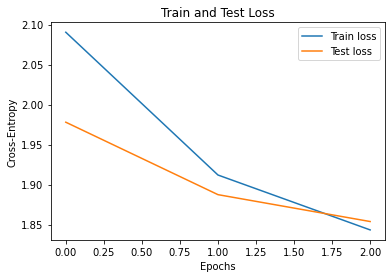

In [10]:
import matplotlib.pyplot as plt

# Plot history: Loss and accuracy
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()